서포트 벡터 머신(Support Vector Machines)

In [54]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
from sklearn.svm import SVR, SVC
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_breast_cancer, load_iris, load_wine
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE

In [87]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

iris=datasets.load_iris() #사이킷런 빌트인 iris 예제 데이터 로드
x=iris['data'][:,(2,3)]
y=(iris['target']==2).astype('int') #index=2 : Versinica

#파이프라인 라이브러리를 통해 데이터 스케일과 모델 적합을 한 번에
svm_clf=Pipeline([
                  ('scaler', StandardScaler()),
                  ('linear_svc', LinearSVC(C=1,loss='hinge'))
])

#모델 훈련
svm_clf.fit(x,y)

new_iris=[[5.5, 1.7]]
prediction=svm_clf.predict(new_iris)[0]

print(prediction) #1 : Versine : True(1)

1


c:\Users\tjoeun\miniconda3\envs\firstenv\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [57]:
from sklearn.svm import SVC
model=SVC(kernel='rbf', probability=True)
model.fit(x, y)
prob=model.predict_proba(new_iris)[0]
print(prob)

#SVM 분류기는 기존 로지스틱 회귀처럼 클래스에 대한 확률 즉, predict_proba() 메소드를 제공하지 않지만
#SVC 모델 안에 probability=True 매개변수를 주게되면 predict_proba() 메소드 사용 가능
#C는 규제항(Cost). 얼마나 많은 데이터 샘플이 다른 클래스에 놓이는 것을 허용하는지 결정
#C의 유무에 따라 하드마진(hard-margin), 소프트마진(soft-margin) SVM이라고 불림

[0.04368955 0.95631045]


In [58]:
#주어진 데이터를 고차원 특징으로 사상해주는 '커널 기법'
#가장 성능이 좋아 자주 사용되는 가우시안 RBF 커널
#gamma는 하나의 데이터 샘플이 영향력을 행사하는 거리를 결정하는 역할. 가우시안 함수의 표준편차와 관련 => 클수록 작은 표준편차를 가짐
#좋은 성능을 얻으려면 매개변수 C와 gamma를 잘 조정해줘야 함. 두 값 모두 커질수록 알고리즘의 복잡도 증가
#C는 데이터 샘플들이 다른 클래스에 놓이는 것을 허용하는 정도를 결정, gamma는 결정 경계의 곡률을 결정

비선형 SVM

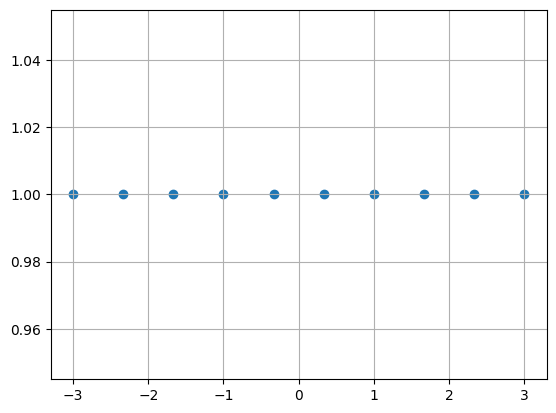

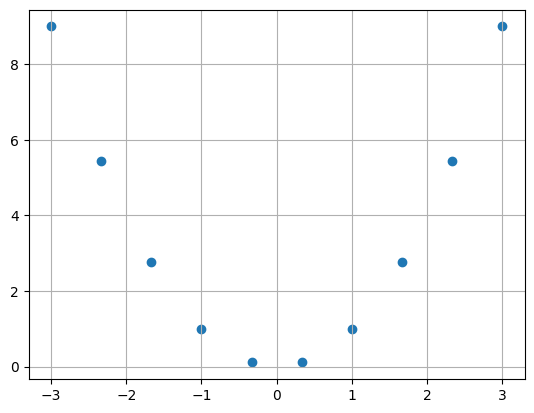

In [59]:
import matplotlib.pyplot as plt
x = np.linspace(-3,3,10)
y = np.linspace(1,1,10)
plt.scatter(x,y)
plt.grid()
plt.show()
b_func = x**2
plt.scatter(x,b_func)
plt.grid()
plt.show()

#첫번째 그래프는 x값이 -3 ~ 3까지 변하지만 y값은 모두 1인 직선 산점도
#두번째 그래프는 x값에 따른 제곱 함수의 결과를 보여주는 산점도

make moons 데이터 학습

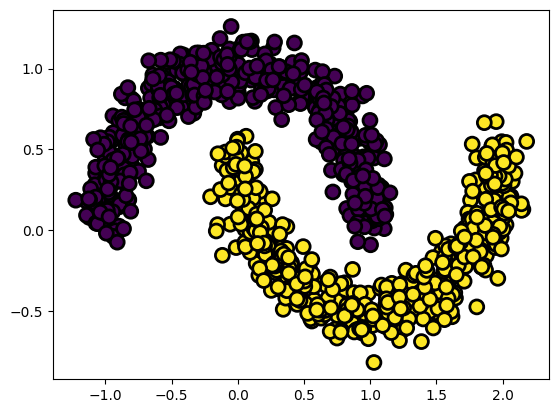

In [60]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures #다항식 특성 변환
from sklearn.svm import LinearSVC #선형SVM(LinearSVC)

#샘플 수 1000개, noise값 0.1, random_State=2022
x, y=make_moons(n_samples=1000, noise=0.1, random_state=2022)
plt.scatter(x[:,0], x[:,1], marker='o', c=y, s=100, edgecolors="black", linewidth=2)
plt.show()

In [61]:
polynomial_std_svm=Pipeline([
                              ("polynomial", PolynomialFeatures(degree=3)), #3차 다항식
                              ("std", StandardScaler()), #평균 0, 표준편차 1이 되도록 표준화
                              ("svm", LinearSVC(C=10, loss='hinge'))
])
#모델 학습
polynomial_std_svm.fit(x, y)

#변수 변환: polynomial 3차 다항식, scaler: StandardScaler, 모델: LinearSVM(c=10, loss=hinge) 사용
#C는 오차 허용 정도를 결정하는 규제 매개변수, loss는 손실 함수
#hinge 손실 함수는 SVM에서 일박적으로 사용되며, 선형 분류에 적합

c:\Users\tjoeun\miniconda3\envs\firstenv\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\tjoeun\miniconda3\envs\firstenv\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('polynomial', PolynomialFeatures(degree=3)),
                ('std', StandardScaler()),
                ('svm', LinearSVC(C=10, loss='hinge'))])

예측

In [62]:
#첫번째 변수값: 2.0, 두번째 변수값: 1.0인 새로운 데이터 예측
new_moon = [[2.0,1.0]]
polynomial_std_svm.predict(new_moon)

array([1], dtype=int64)

SVM을 사용한 회귀 모델 (SVR)

In [63]:
X, y = load_breast_cancer(return_X_y=True) #특성데이터와 타겟데이터 반환
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.2)

model  = SVR()
model.fit(X_train, y_train)
          
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

#SVR모델: 회귀 문제를 해결하기 위한 SVM의 변형 중 하나. 데이터 포인트들 간의 간격을 최대화하여 예측하는 회귀 모델

학습 데이터 점수 : 0.7253575837897157
평가 데이터 점수 : 0.7660991729727397


커널 (다항식, 가우시안RBF)

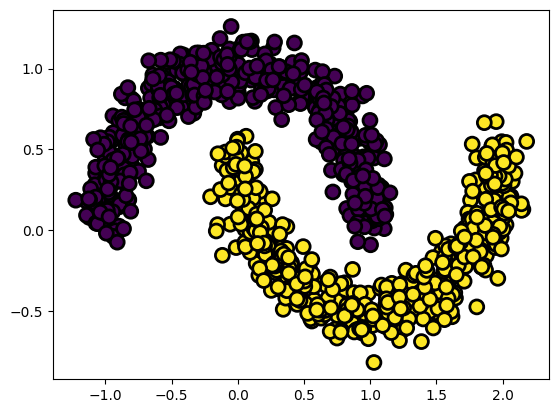

In [64]:
#낮은 차수 다항식은 복잡한 모델을 표현하기 쉽지 않음 => 많은 차수를 사용해 모델을 학습해야함
#BUT 많은 차수를 사용한 모델은 학습속도를 무시무시하게 떨어뜨리거나 동작을 안하는 경우도 있음

x, y = make_moons(n_samples=1000, noise=0.1, random_state=2022)
plt.scatter(x[:, 0], x[:, 1], marker='o', c=y, s=100, edgecolor="black", linewidth=2)
#x[:,0]은 x좌표, x[:,1]은 y좌표

In [65]:
from sklearn.svm import SVC
poly_kernel_std_svm=Pipeline([
                            ("std",StandardScaler()),
                            ("poly_kernel_svm",SVC(kernel='poly', degree=3, coef0=1,C=5))
])
poly_kernel_std_svm.fit(x,y)       

#coef0: 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을지를 조절. 적절한 값으로 지정시 고차항의 영향을 줄일 수 있음
#C: 오차 허용 정도를 결정하는 매개변수. 큰값일수록 소프트마진, 작은값일수록 하드마진

Pipeline(steps=[('std', StandardScaler()),
                ('poly_kernel_svm', SVC(C=5, coef0=1, kernel='poly'))])

가우시안 RBF(Radial Basis Function) 커널

In [66]:
rbf_kernel_std_svm = Pipeline([
                               ('std',StandardScaler()),
                               ('rbf_kernel_svm',SVC(kernel='rbf',gamma=3,C=0.001))
])
rbf_kernel_std_svm.fit(x,y)

#Pipeline: 여러 단계의 변환 및 추정을 연결하여 하나의 추정기로 구성 => 여러 단계의 처리를 간편하게 연결
#gamma=3: 커널의 폭을 조절하는 매개변수. 작은 값은 넓은 폭, 큰 값은 좁은 폭
#C=0.001: 오차 허용 정도를 결정하는 규제 매개변수. 작은 값일수록 오차를 많이 허용하는 소프트마진
#모델 복잡도를 조절하기 위해선 gamma와 C를 함께 조절해야 함
#하이퍼파라미터 조절: 그리드 탐색법 사용(그리드 큰 폭 -> 그리드 작은 폭으로 줄여가면서 탐색)

Pipeline(steps=[('std', StandardScaler()),
                ('rbf_kernel_svm', SVC(C=0.001, gamma=3))])

매개변수 튜닝

In [67]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#return_X_y=True: 특성 데이터와 타겟 데이터를 반환
#SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능. 매개변수를 변경하면서 성능 변화 관찰

In [68]:
polynomial_model  = SVC(kernel='poly',degree=2, C=0.1, gamma='auto')
polynomial_model.fit(X_train, y_train)

print('kernel=poly,degree={}, C={}, gamma={}'.format(2, 0.1, 'auto'))         
print('polynomial svc학습 데이터 점수 : {}'.format(polynomial_model.score(X_train, y_train)))
print('polynomial svc 평가 데이터 점수 : {}'.format(polynomial_model.score(X_test, y_test)))

#kernel='poly': 다항 커널, degree=2: 2차 다항식, gamma_auto: gamma 매개변수를 자동으로 계산
#다항 커널을 사용하는 SVM 모델 -> 학습데이터와 평가데이터에 대한 예측 정확도 출력

kernel=poly,degree=2, C=0.1, gamma=auto
polynomial svc학습 데이터 점수 : 0.9802197802197802
polynomial svc 평가 데이터 점수 : 0.9122807017543859


In [69]:
rbf_model  = SVC(kernel='rbf', C=2.0, gamma='auto')
rbf_model.fit(X_train, y_train)

print('kernel=rbf,degree={}, C={}, gamma={}'.format(2, 0.1, 'auto')) #사용된 모델의 하이퍼파라미터 출력   
print('rbf svc학습 데이터 점수 : {}'.format(rbf_model.score(X_train, y_train))) #학습데이터에 대한 예측 정확도 출력
print('rbf svc평가 데이터 점수 : {}'.format(rbf_model.score(X_test, y_test))) #평가데이터에 대한 예측 정확도 출력

kernel=rbf,degree=2, C=0.1, gamma=auto
rbf svc학습 데이터 점수 : 1.0
rbf svc평가 데이터 점수 : 0.6140350877192983


데이터 전처리

In [70]:
#SVM은 입력 데이터가 정규화되어야 좋은 성능을 보임
#주로 모든 특성 값을 [0, 1]범위로 맞추는 방법 사용 => StandardScaler 또는 Minmaxscaler를 사용해 정규화

In [71]:
X, y = load_breast_cancer(return_X_y=True) #특성 데이터와 타겟 데이터를 반환
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #전체 데이터의 20%가 평가용으로 사용됨

In [72]:
model  = SVC()
model.fit(X_train, y_train)
    
print('svc학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('svc평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

svc학습 데이터 점수 : 0.9208791208791208
svc평가 데이터 점수 : 0.9122807017543859


In [73]:
scaler = StandardScaler() #평균 0, 표준편차 1이 되도록 데이터 반환
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#평가 데이터를 반환할 때에는 항상 동일한 변환 규칙 적용 => fit_transform()이 아닌 transform()
#데이터 스케일이 중요한 역할을 하는 'SVM'

In [74]:
#StandardScaler 후 모델
model  = SVC()
model.fit(X_train, y_train)
    
print('svc학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('svc평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

svc학습 데이터 점수 : 0.9868131868131869
svc평가 데이터 점수 : 0.9824561403508771


In [75]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
#MinMaxScaler 후 모델
model=SVC()
model.fit(X_train, y_train)

print('svc학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('svc평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

svc학습 데이터 점수 : 0.9824175824175824
svc평가 데이터 점수 : 0.9824561403508771


Linear SVR

보스턴 주택 가격

In [77]:
boston = pd.read_csv('./Boston_house.csv')
data = boston
label = boston['Target'] #Target 열을 타겟 데이터로 지정하여 label 변수에 저장
del boston['Target'] #Target 열 삭제
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=2019)

In [78]:
#보스턴 주택 데이터셋의 특성 데이터를 표준화
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
#선형 커널을 사용하는 SVR(Support Vector Regression)모델
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [80]:
print('SVR학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('SVR평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

SVR학습 데이터 점수 : 0.7244226615768916
SVR평가 데이터 점수 : 0.5964897569374126


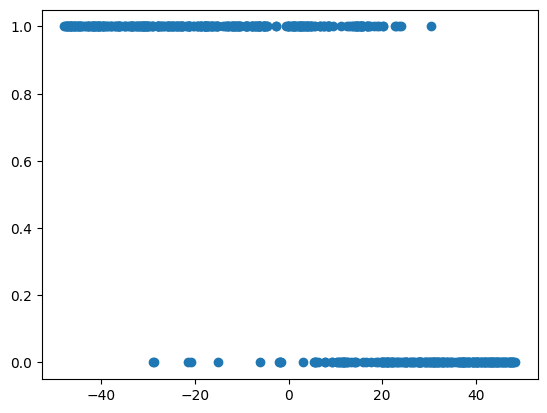

In [81]:
#TSNE를 사용해 데이터를 1차원으로 차원 축소 -> 축소된 데이터를 시각화
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

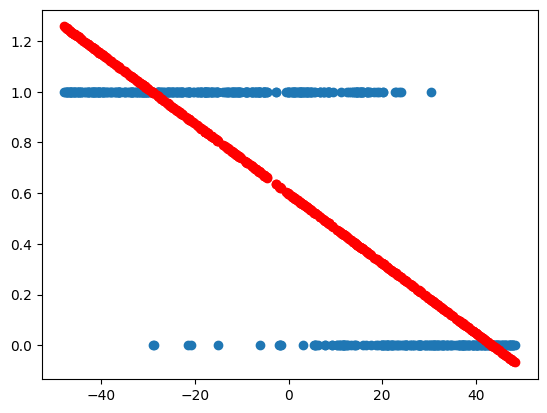

In [82]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r')

In [91]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [92]:
from sklearn.pipeline import make_pipeline

#파이프라인 생성
estimator = make_pipeline(StandardScaler(), SVR(kernel='linear'))

#교차 검증 수행
cross_validate(
    estimator= estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   5 out of   5 | elapsed:    1.2s finished


{'fit_time': array([5.62477112e-03, 4.62841988e-03, 5.60283661e-05, 0.00000000e+00,
        1.64241791e-02]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([0.43039087, 0.51655019, 0.48275821, 0.4224617 , 0.53077081])}

In [93]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='linear'))])
param_grid = [{'model__gamma':['scale', 'auto'],
               'model__C': [1.0, 0.1, 0.01],
               'model__epsilon':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=6,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [94]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='linear'))])